In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
from rich.progress import track
from joblib import Parallel, delayed

import matplotlib.pyplot as plt
%matplotlib inline


import torch
from torch.utils.data import Dataset, DataLoader

sys.path.append("../src")
from utils.feature import FeatureStore
from utils.common import load_pickle, dump_pickle, save_cache

In [2]:
featfure_dir = pathlib.Path("../data/preprocessing/")

scaler = load_pickle(f"../data/scaler/scaler_wifi_rssi.pkl")
wifi_bssid = np.load(featfure_dir / "train_wifi_bssid.npy")
test_wifi_bssid = np.load("../data/submit/test_wifi_bssid.npy")


Load pickle from ../data/scaler/scaler_wifi_rssi.pkl


In [43]:
featfure_dir = pathlib.Path("../data/preprocessing/")

wifi_bssid = np.load(featfure_dir / "train_wifi_bssid.npy")
wifi_rssi = np.load(featfure_dir / "train_wifi_rssi.npy")

In [44]:
(wifi_bssid==0).mean()

0.09459935887833668

In [45]:
name = 'wifi_rssi'
scaler = load_pickle(f"../data/scaler/scaler_{name}.pkl")

Load pickle from ../data/scaler/scaler_wifi_rssi.pkl


In [46]:
(scaler.inverse_transform(wifi_rssi).round()==-999).mean()

0.09459935887833668

In [77]:
tmp = scaler.inverse_transform(wifi_rssi).round()

tmp_scaler = StandardScaler()
tmp_scaler.fit(tmp.reshape(-1, 1))


d = tmp_scaler.transform(tmp.reshape(-1, 1)).reshape(-1, 100)

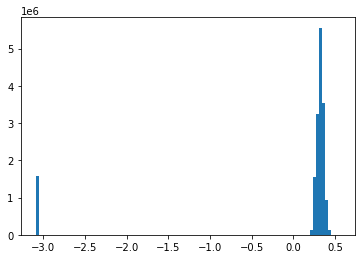

In [78]:
plt.figure()
plt.hist(d.ravel(), bins=100)
plt.show()

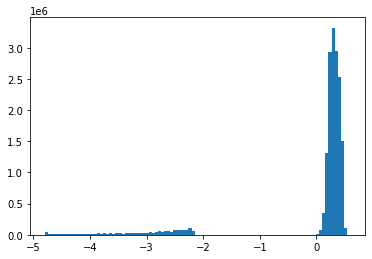

In [82]:
plt.figure()
plt.hist(wifi_rssi.ravel(), bins=100)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

data = np.array([[1, 0], [0, 0], [1, 1], [1, 1]])
scaler = StandardScaler()
scaler.fit(data)
print(scaler.mean_)

[0.75 0.5 ]
